In [22]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from sklearn.decomposition import FastICA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



 1. Select a High-Dimensional Dataset

 We will be using iris dataset




2. Preprocess the Data

In [6]:
iris = load_iris()
iris


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

3. Apply Dimensionality Reduction Techniques

3.1 Principal Component Analysis (PCA)

In [8]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

3.2 Linear Discriminant Analysis (LDA)

In [9]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

3.3 t-Distributed Stochastic Neighbor Embedding (t-SNE)

In [10]:
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_test_tsne = tsne.fit_transform(X_test_scaled)

3.4 Independent Component Analysis (ICA)

In [11]:
ica = FastICA(n_components=2, random_state=42)
X_train_ica = ica.fit_transform(X_train_scaled)
X_test_ica = ica.transform(X_test_scaled)

3.5 Feature Selection Methods (SelectKBest and RFE)

In [12]:
#Selecting KBest
select_k_best = SelectKBest(score_func=f_classif, k=2)
X_train_kbest = select_k_best.fit_transform(X_train_scaled, y_train)
X_test_kbest = select_k_best.transform(X_test_scaled)

#Recursive Feature Elimination (RFE)
log_reg = LogisticRegression()
rfe = RFE(log_reg, n_features_to_select=2)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

4. Visualize the Reduced Dimensions

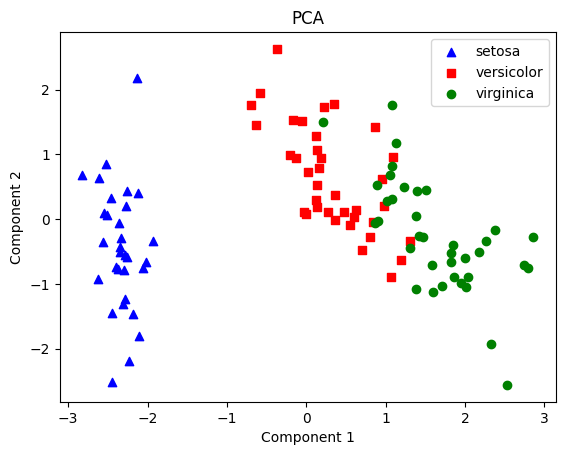

In [14]:
import matplotlib.pyplot as plt

def plot_reduced_dimensions(X, y, title):
    plt.figure()
    for label, marker, color in zip(range(3), ('^', 's', 'o'), ('blue', 'red', 'green')):
        plt.scatter(x=X[y==label, 0], y=X[y==label, 1], marker=marker, color=color, label=iris.target_names[label])
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    plt.show()

plot_reduced_dimensions(X_train_pca, y_train, 'PCA')



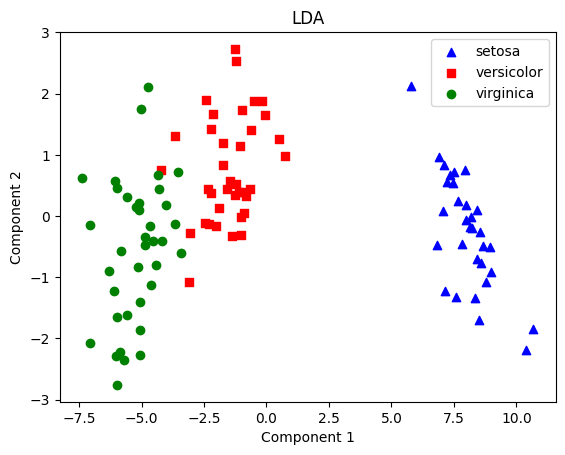

In [15]:

plot_reduced_dimensions(X_train_lda, y_train, 'LDA')


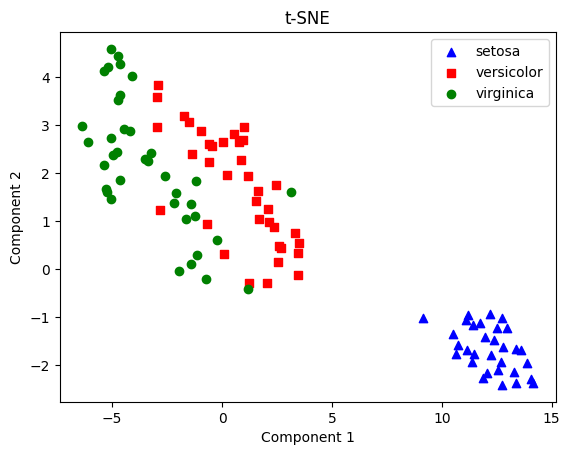

In [16]:

plot_reduced_dimensions(X_train_tsne, y_train, 't-SNE')

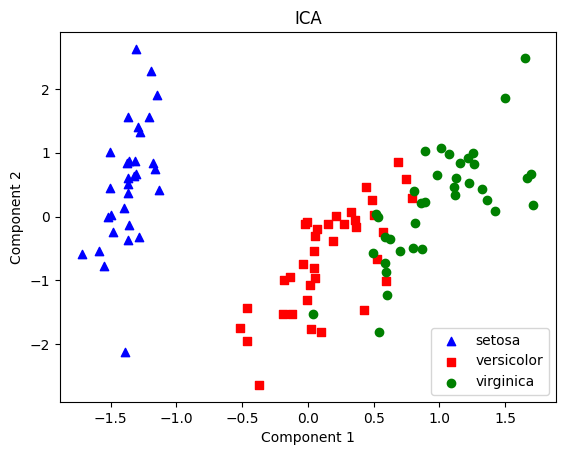

In [17]:

plot_reduced_dimensions(X_train_ica, y_train, 'ICA')

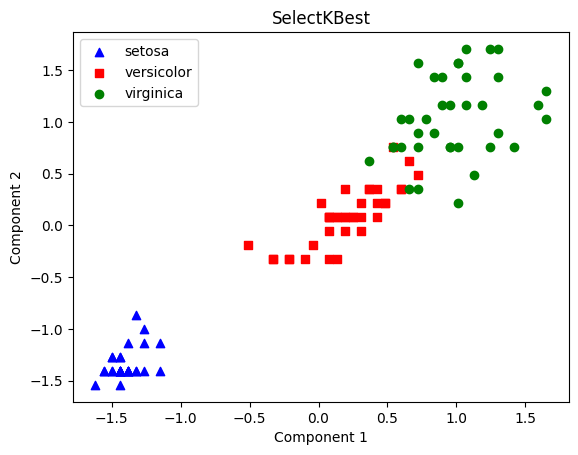

In [18]:
plot_reduced_dimensions(X_train_kbest, y_train, 'SelectKBest')

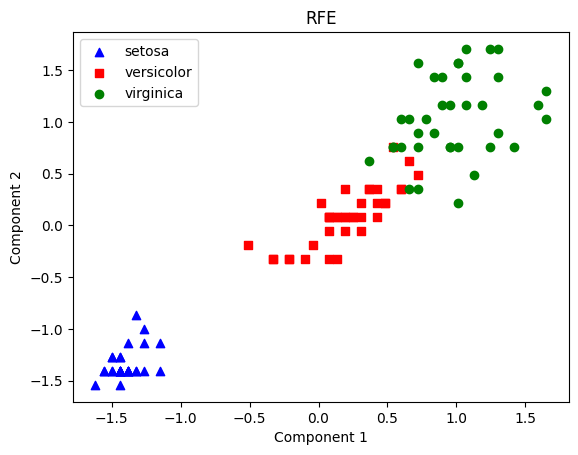

In [19]:
plot_reduced_dimensions(X_train_rfe, y_train, 'RFE')

5. Evaluate Model Performance

In [23]:
def evaluate_model(X_train, X_test, y_train, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)


In [24]:
print("Original Data Accuracy:", evaluate_model(X_train_scaled, X_test_scaled, y_train, y_test))

Original Data Accuracy: 1.0


In [25]:
print("PCA Reduced Data Accuracy:", evaluate_model(X_train_pca, X_test_pca, y_train, y_test))

PCA Reduced Data Accuracy: 0.9111111111111111


In [26]:
print("LDA Reduced Data Accuracy:", evaluate_model(X_train_lda, X_test_lda, y_train, y_test))

LDA Reduced Data Accuracy: 1.0


In [27]:
print("t-SNE Reduced Data Accuracy:", evaluate_model(X_train_tsne, X_test_tsne, y_train, y_test))

t-SNE Reduced Data Accuracy: 0.4222222222222222


In [28]:
print("ICA Reduced Data Accuracy:", evaluate_model(X_train_ica, X_test_ica, y_train, y_test))

ICA Reduced Data Accuracy: 0.9555555555555556


In [29]:
print("SelectKBest Reduced Data Accuracy:", evaluate_model(X_train_kbest, X_test_kbest, y_train, y_test))

SelectKBest Reduced Data Accuracy: 1.0


In [30]:
print("RFE Reduced Data Accuracy:", evaluate_model(X_train_rfe, X_test_rfe, y_train, y_test))

RFE Reduced Data Accuracy: 1.0
